In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [138]:
st = pd.read_csv("C:/Users/tejas/OneDrive/Desktop/startup_funding.csv")

# Number of Funding

In [139]:
df = st.copy()

In [140]:
df['Year'] = df['Date'].str[-4:]

year = df['Year'].value_counts()
year.sort_index(inplace=True)

index = year.index
value = year.values

for i in range (len(year)):
    print(index[i],value[i])

2015 936
2016 993
2017 443


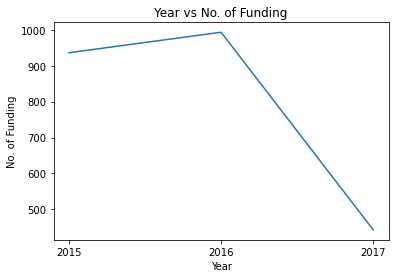

In [141]:
plt.plot(index,value)
plt.xlabel('Year')
plt.ylabel('No. of Funding')
plt.title('Year vs No. of Funding')
plt.show()

# Top Indian Cities

In [142]:
df = st.copy()

In [143]:
df.dropna(subset=['CityLocation'],inplace=True)

def separateCity(city):
    return city.split('/')[0].strip()

df['CityLocation']=df['CityLocation'].apply(separateCity)

df['CityLocation'].replace('Delhi','New Delhi',inplace=True)
df['CityLocation'] = df['CityLocation'].str.title()

cities = df['CityLocation'].value_counts()[:10]
index=cities.index
value=cities.values

for i in range (len(cities)):
    print(index[i],value[i])

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


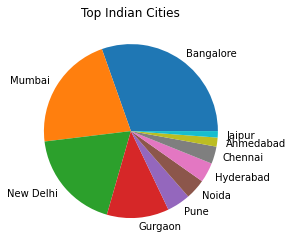

In [144]:
plt.pie(value,labels=index)
plt.title('Top Indian Cities')
plt.show()

# Funding Amount

In [145]:
df = st.copy()

df.dropna(subset=['CityLocation', 'AmountInUSD'], inplace=True)

def separateCity(city):
    return city.split('/')[0].strip()

def amount_generate(amt):
    amt = amt.replace(',', '').strip()
    return int(amt)

df['CityLocation'] = df['CityLocation'].apply(separateCity)

df['CityLocation'].replace('Delhi', 'New Delhi', inplace=True)
df['CityLocation'] = df['CityLocation'].str.title()

df['AmountInUSD'] = df['AmountInUSD'].apply(amount_generate)

grouped_df = df.groupby('CityLocation')['AmountInUSD'].sum().nlargest(10)

total_funding = grouped_df.sum()
city_percentages = (grouped_df / total_funding) * 100

for city, percentage in city_percentages.items():
    print(city, '{:0.2f}'.format(percentage))


Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


# Investment Type

In [146]:
df = st.copy()

df.dropna(subset=['InvestmentType','AmountInUSD'],inplace=True)

df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)

def amount_generator(amt):
    amt=amt.replace(',','')
    return int(amt)

df['AmountInUSD'] = df['AmountInUSD'].apply(amount_generator)

grouped_df = df.groupby('InvestmentType')['AmountInUSD'].sum().nlargest()

total = grouped_df.sum()
percentage = (grouped_df/total)*100

for inv,per in percentage.items():
    print(inv,'{:0.2f}'.format(per))

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


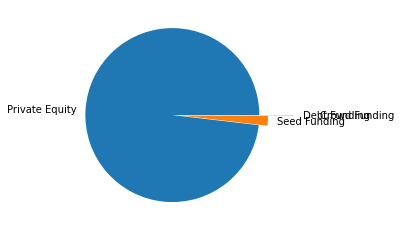

In [147]:
explode = [0,0.1,0.4,0.6]
plt.pie(percentage,labels=percentage.index,explode=explode)
plt.show()

# Top Industries

In [148]:
df = st.copy()

df.dropna(subset=['IndustryVertical', 'AmountInUSD'], inplace=True)

df['IndustryVertical'].replace('eCommerce', 'Ecommerce', inplace=True)
df['IndustryVertical'].replace('ECommerce', 'Ecommerce', inplace=True)

def amount_generator(amt):
    amt = amt.replace(',', '')
    return int(amt)

df['AmountInUSD'] = df['AmountInUSD'].apply(amount_generator)

grouped_df = df.groupby('IndustryVertical')['AmountInUSD'].sum().nlargest()

total = grouped_df.sum()
percentage = (grouped_df / total) * 100

for ind, per in percentage.items():
    print(ind, '{:0.2f}'.format(per))


Ecommerce 40.52
Consumer Internet 35.96
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


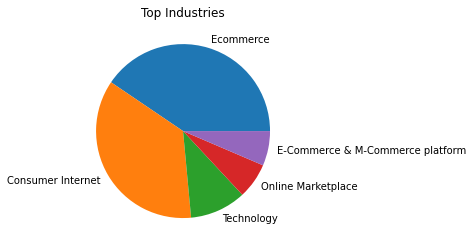

In [149]:
plt.pie(percentage,labels=percentage.index)
plt.title('Top Industries')
plt.show()

# Top Startups

In [150]:
df = st.copy()

df.dropna(subset = ['StartupName','AmountInUSD'], inplace=True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)

def amount_generated(amt):
    amt=amt.replace(',','').strip()
    return int(amt)

df['AmountInUSD'] = df["AmountInUSD"].apply(amount_generated)

grouped_df = df.groupby('StartupName')['AmountInUSD'].sum().nlargest()

name = grouped_df.index

for i in range (len(name)):
    print(name[i])

Paytm
Flipkart
Ola
Snapdeal
Oyo


# Funding Rounds

In [151]:
df = st.copy()

In [152]:
df.dropna(subset=['StartupName'],inplace=True)

df['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)

count = df['StartupName'].value_counts().nlargest(5)

name = count.index
no_of_funding = count.values

for i in range (len(name)):
    print(name[i],no_of_funding[i])

Ola 9
Swiggy 7
UrbanClap 6
Paytm 6
Oyo 6


# Top Investor

In [153]:
df = st.copy()

df.dropna(subset=['InvestorsName'],inplace=True)

investor_list = list(df['InvestorsName'])

d={}
def names(invest):
    l = invest.split(',')
    for i in l:
        i = i.strip()
        if i in d:
            d[i] += 1
        else:
            d[i] = 1
            
df.InvestorsName = df.InvestorsName.apply(names)
            
key = np.array(list(d.keys()))
value = np.array(list(d.values()))

ind = value.argmax()

print(key[ind],value[ind])

Sequoia Capital 64
